In [181]:
import pandas as pd
import seaborn as sns
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
df=pd.read_csv('CleanDataSalaries.csv')

In [183]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,label
0,2021,EN,FT,Data Science Consultant,64369.0,DE,50,DE,L,Rest
1,2020,SE,FT,Data Scientist,68428.0,GR,100,US,L,Scientist
2,2021,EX,FT,Head of Data Science,85000.0,RU,0,RU,M,Leader position
3,2021,EX,FT,Head of Data,230000.0,RU,50,RU,L,Leader position
4,2021,EN,FT,Machine Learning Engineer,125000.0,US,100,US,S,Engineer


In [184]:
y=df.select_dtypes(include='object')  
columnNames=y.columns.tolist() #uzyskuję wszytskie kolumny, które są obiektami do zmiany na kategorię
        

#Zmieniam obiekty na kategorie.
for col in columnNames:
    df[col]=df[col].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           245 non-null    int64   
 1   experience_level    245 non-null    category
 2   employment_type     245 non-null    category
 3   job_title           245 non-null    category
 4   salary_in_usd       245 non-null    float64 
 5   employee_residence  245 non-null    category
 6   remote_ratio        245 non-null    int64   
 7   company_location    245 non-null    category
 8   company_size        245 non-null    category
 9   label               245 non-null    category
dtypes: category(7), float64(1), int64(2)
memory usage: 12.4 KB


In [185]:
#Zapisuje nowy dataFrame
dfCopy=df.copy(deep=True)
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           245 non-null    int64   
 1   experience_level    245 non-null    category
 2   employment_type     245 non-null    category
 3   job_title           245 non-null    category
 4   salary_in_usd       245 non-null    float64 
 5   employee_residence  245 non-null    category
 6   remote_ratio        245 non-null    int64   
 7   company_location    245 non-null    category
 8   company_size        245 non-null    category
 9   label               245 non-null    category
dtypes: category(7), float64(1), int64(2)
memory usage: 12.4 KB


In [186]:
class ProcessingData:
    @staticmethod
    def splitSet(x,k):  #k=0.7
        n=int(len(x)*k) #numer przecięcia zbiorów
        xTrain= x[:n]   #podział zbioru
        xVal=x[n:]     
        return xTrain,xVal
    
    @staticmethod
    def shuffle(x): #tasowanie zbioru
        n=len(x)-1
        while(n>=0):
            i=rd.randint(0,n)
            x.iloc[i],x.iloc[n]=x.iloc[n],x.iloc[i]
            n-=1
        return x
    
    #normalizacja tylko kolumny salary_in_usd
    @staticmethod
    def normalize(x,column): #normalizacja min/max zbioru, zminana przedziału zbioru x'=(x-min)/(max-min)
#         values=x.select_dtypes(include='float64') 
#         columnNames=values.columns.tolist()
#         for column in columnNames:
        data=x.loc[:,column] #wszytkie wartości z jednej kolumnie
        max1=max(data)
        #print(max1)
        min1=min(data)
        #print(min1)
        for i in range(len(data)):            
            x.at[i,column]=float(x.at[i,column]-min1)/(max1-min1)   

        return x
    
    
    def changeToNumeric(x):
        #zmiana typu kolumny salary_in_usd na float aby po normalizacji nie było 0
        
        
        y=x.select_dtypes(include='category')  
        
        columnNames=y.columns.tolist()
        
        for column in columnNames:            
            
            categoriesOfCol=x[column].cat.categories.tolist()
            x.loc[:,column]=x.loc[:,column].astype(object)
            newValues=[]
            data=x.loc[:,column] #wszytkie wartości z jednej kolumny
            
            for i in range(len(data)):
                x.at[i,column]=categoriesOfCol.index(x.at[i,column])
                #zapisuje pod jakim indeksem jest jakie słowo np. EN indeks 0 itd.
            x.loc[:,column]=x.loc[:,column].astype('float64')
                #newValues=pd.to_numeric(newValues)
        
        #Osobno bo nie zaczytuje się jako int
        x.loc[:,'work_year']=x.loc[:,'work_year'].astype('float64') 
        x.loc[:,'remote_ratio']=x.loc[:,'remote_ratio'].astype('float64') 

        return x

In [187]:
numericData=ProcessingData.changeToNumeric(df)
numericData.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,label
0,2021.0,0.0,2.0,17.0,64369.0,9.0,50.0,10.0,0.0,3.0
1,2020.0,3.0,2.0,20.0,68428.0,14.0,100.0,39.0,0.0,4.0
2,2021.0,1.0,2.0,27.0,85000.0,38.0,0.0,34.0,1.0,2.0
3,2021.0,1.0,2.0,26.0,230000.0,38.0,50.0,34.0,0.0,2.0
4,2021.0,0.0,2.0,32.0,125000.0,43.0,100.0,39.0,2.0,1.0


In [188]:
numericData.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,245.0,2020.730612,0.444550,2020.0,2020.0,2021.0,2021.0,2021.0
experience_level,245.0,1.828571,1.102902,0.0,1.0,2.0,3.0,3.0
employment_type,245.0,1.983673,0.326021,0.0,2.0,2.0,2.0,3.0
job_title,245.0,20.077551,9.888627,0.0,15.0,20.0,27.0,42.0
salary_in_usd,245.0,99868.012245,83983.326949,2876.0,45896.0,81000.0,130000.0,600000.0
employee_residence,245.0,27.167347,14.978145,0.0,12.0,29.0,43.0,44.0
remote_ratio,245.0,69.183673,37.593421,0.0,50.0,100.0,100.0,100.0
company_location,245.0,26.248980,13.301333,0.0,13.0,31.0,39.0,40.0
company_size,245.0,0.697959,0.828906,0.0,0.0,0.0,1.0,2.0
label,245.0,2.110204,1.557668,0.0,1.0,1.0,4.0,4.0


In [189]:
ProcessingData.shuffle(numericData)
processedData=df.copy(True)
numericData.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,label
0,2021.0,3.0,2.0,20.0,87961.0,5.0,100.0,5.0,2.0,4.0
1,2021.0,3.0,2.0,20.0,87961.0,5.0,100.0,5.0,2.0,4.0
2,2021.0,3.0,2.0,21.0,165000.0,43.0,100.0,39.0,0.0,3.0
3,2021.0,3.0,2.0,20.0,87961.0,5.0,100.0,5.0,2.0,4.0
4,2020.0,3.0,2.0,15.0,188000.0,43.0,100.0,39.0,0.0,1.0


In [190]:
trainData,testData=ProcessingData.splitSet(processedData,0.7)

In [191]:
#Zapisanie dataframe do pliku
trainData.to_csv('TrainDataSalaries.csv',index=False)
testData.to_csv('TestDataSalaries.csv',index=False)

In [192]:
#Klasyfikacja k najbliższych sąsiadów z podziałem na kategorie
class KNNCategory:
    
    
    @staticmethod
    def taxi(x,y):
        s=0
        for k in range(len(y)):
            s+=abs(x[k]-y[k])
        return s
    
    @staticmethod
    def minkowski(v1,v2,m):
        distance=0
        for e in range(0,len(v1)):
            distance+=abs(v1[e]-v2[e])**m
        return distance**(1/m)
    
    @staticmethod
    def clustering(data,sample,k,objects,labels,typeOfCalculation,colName):
        
        distances=[]
        classesJobTitle=[0 for x in range(len(objects))] #wszytskie stanowiska pracy
        classesLabels=[0 for x in range(len(labels))] #wszytskie kategoire
        #liczy dystans do każdego rekordu od sample
        for x in range(len(data)):
            #print(data.iloc[x])
            if typeOfCalculation==0:
                distances.append(KNNCategory.minkowski(sample,data.iloc[x],2))
            elif typeOfCalculation==1:
                distances.append(KNNCategory.taxi(sample,data.iloc[x]))
            

        
        #sortuje według dodanej kolumny odległości, od najmniejszej do największej
        data=data.assign(dist=distances)
        data=data.sort_values(by=['dist'])
       
        #Liczy dla k pierwszych rekordów z data jakiego typu są te wartości
       
        for i in range(0,k):
            classesLabels[int(data.iloc[i].label)]+=1
        labelResult = classesLabels.index(max(classesLabels))
        
        #Wybiera rekordy z danej kategorii
        data1=data.loc[data['label']==labelResult ] 
        
        #sortuje według dodanej kolumny odległości, od najmniejszej do największej
        #data1=data1.assign(dist=distances)
        data1=data1.sort_values(by=['dist'])
        data1=data1.drop(['dist'],axis=1)
        K=k
        if len(data1)<k:
            K=len(data1)
        
        #Liczy dla k pierwszych rekordów z data jakiego typu są te wartości
        for i in range(0,K):
            classesJobTitle[int(data1.iloc[i].at[colName])]+=1 
        return classesJobTitle.index(max(classesJobTitle))

In [193]:
dfCopy['label'].cat.categories.tolist()

['Analyst', 'Engineer', 'Leader position', 'Rest', 'Scientist']

In [148]:
KNNCategory.clustering(trainData,testData.iloc[0],3,dfCopy['job_title'].cat.categories.tolist(),dfCopy['label'].cat.categories.tolist(),1,'job_title')

20

In [150]:
dfCopy['job_title'].cat.categories[20]

'Data Scientist'

In [194]:

#Analiza dokładności
class Analize:

    
    @staticmethod
    def analizeKNNCategory(train,test,k,objects,labels,typeOfCalculation,colName):
        c=0
        for x in range(0,len(test)):
            if(test.iloc[x].at[colName]==KNNCategory.clustering(train,test.iloc[x],k,objects,labels,typeOfCalculation,colName)):
                c+=1
        return c/len(test)*100

    @staticmethod
    def analizeKNN(train,test,k,objects,typeOfCalculation,colName):
        c=0
        for x in range(0,len(test)):
            if(test.iloc[x].at[colName]==KNN.clustering(train,test.iloc[x],k,objects,typeOfCalculation,colName)):
                c+=1
        return c/len(test)*100

In [152]:
#Analiza poprawnego k oraz dla danych znormalizownaych oraz nieznormalizowanych 

rangeOfK=[x for x in range(2,16)]
#Dane nieznormalizowane k w zakresie od 
knnCatWyniki=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(df,0.7)
        solution.append(Analize.analizeKNNCategory(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),dfCopy['label'].cat.categories.tolist(),t,'job_title'))
    print(solution)
    knnCatWyniki.append(solution)
#MINKOWKSI, TAXI
#TAXI najlepsza ale i tak słaba możńa spróbowac z innym sposobem podziału np 30:70

[39.189189189189186, 39.189189189189186, 36.486486486486484, 32.432432432432435, 32.432432432432435, 27.027027027027028, 27.027027027027028, 28.37837837837838, 29.72972972972973, 31.08108108108108, 31.08108108108108, 29.72972972972973, 27.027027027027028, 24.324324324324326]
[39.189189189189186, 39.189189189189186, 36.486486486486484, 32.432432432432435, 32.432432432432435, 27.027027027027028, 27.027027027027028, 28.37837837837838, 29.72972972972973, 31.08108108108108, 31.08108108108108, 29.72972972972973, 27.027027027027028, 24.324324324324326]


            0
2   35.135135
3   35.135135
4   29.729730
5   31.081081
6   27.027027
7   28.378378
8   22.972973
9   28.378378
10  27.027027
11  25.675676
12  25.675676
13  25.675676
14  24.324324
15  22.972973


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

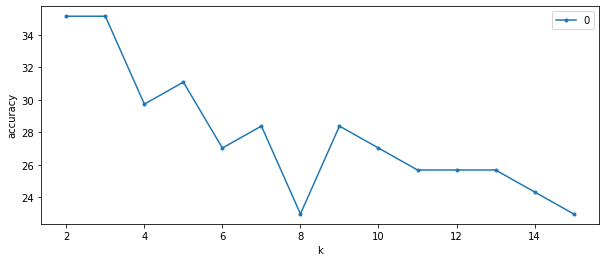

In [97]:
#Wykres dokładności nieznormalizowancyh danych MINKOWSKI
data=pd.DataFrame(knnCatWyniki[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

            0
2   36.486486
3   36.486486
4   29.729730
5   31.081081
6   27.027027
7   28.378378
8   22.972973
9   28.378378
10  27.027027
11  25.675676
12  25.675676
13  25.675676
14  24.324324
15  22.972973


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

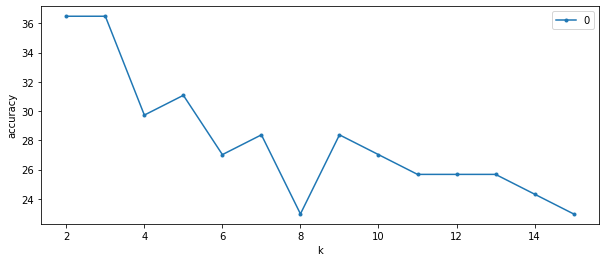

In [98]:
#Wykres dokładności nieznormalizowancyh danych TAXI
data=pd.DataFrame(knnCatWyniki[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

In [82]:
#Analiza dla znormalizowanych
normalizedData=df.copy(True)
ProcessingData.normalize(normalizedData)
normalizedData.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,label
0,1.0,0.000000,0.666667,1.000,0.134183,0.279070,0.5,0.333333,0.0,1.0
1,0.0,0.000000,0.666667,0.475,0.081131,0.255814,0.0,0.307692,1.0,1.0
2,1.0,0.000000,0.666667,0.250,0.145906,0.976744,1.0,0.974359,1.0,0.0
3,0.0,0.000000,0.666667,0.475,0.081131,0.255814,0.0,0.307692,1.0,1.0
4,1.0,0.666667,0.666667,0.475,0.000000,0.604651,0.0,0.666667,1.0,1.0


In [58]:
knnCatWynikiN=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(df,0.7)
        solution.append(Analize.analizeKNNCategory(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),dfCopy['label'].cat.categories.tolist(),t))
    print(solution)
    knnCatWynikiN.append(solution)
#Bardzo mała dokładność.
#Próba normalizacji dla samej kolumny wypłaty.

[6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 5.405405405405405, 5.405405405405405, 5.405405405405405, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757]
[6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 6.756756756756757, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 6.756756756756757]


           0
2   6.756757
3   6.756757
4   6.756757
5   6.756757
6   6.756757
7   6.756757
8   5.405405
9   5.405405
10  5.405405
11  6.756757
12  6.756757
13  6.756757
14  6.756757
15  6.756757


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

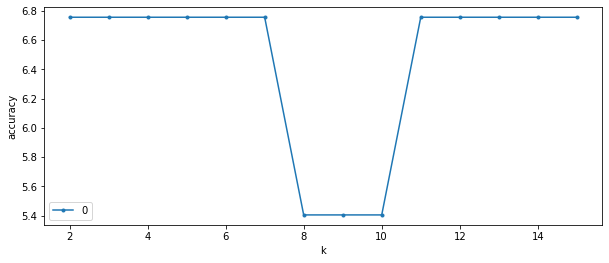

In [100]:
#Wykres dokładności znormalizowancyh danych MINKOWSKI
data=pd.DataFrame(knnCatWynikiN[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

           0
2   6.756757
3   6.756757
4   6.756757
5   6.756757
6   6.756757
7   6.756757
8   5.405405
9   5.405405
10  5.405405
11  5.405405
12  5.405405
13  5.405405
14  5.405405
15  6.756757


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

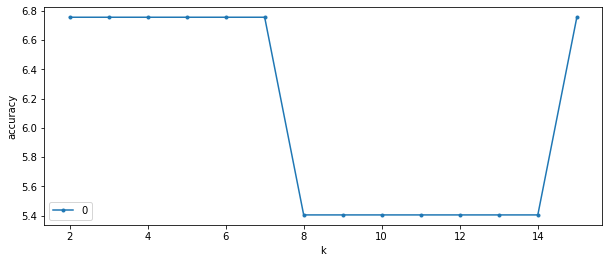

In [104]:
#Wykres dokładności znormalizowancyh danych TAXI
data=pd.DataFrame(knnCatWynikiN[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))
#Brak róznych wyników może wynikać z małych zakresów,małej różnorodności dancyh po normalizacji, mniejszych odległości, więc gorszej klasyfikacji.

In [85]:
#Analiza dokładności dla normalizacji samej kolumny wypłata
ProcessingData.normalize(processedData,'salary_in_usd')
processedData.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,label
0,2021.0,0.0,2.0,41.0,0.134183,13.0,50.0,14.0,0.0,4.0
1,2020.0,0.0,2.0,20.0,0.081131,12.0,0.0,13.0,2.0,4.0
2,2021.0,0.0,2.0,11.0,0.145906,43.0,100.0,39.0,2.0,0.0
3,2020.0,0.0,2.0,20.0,0.081131,12.0,0.0,13.0,2.0,4.0
4,2021.0,2.0,2.0,20.0,0.000000,27.0,0.0,27.0,2.0,4.0


In [78]:
knnCatWynikiNWyplata=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(processedData,0.7)
        solution.append(Analize.analizeKNNCategory(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),dfCopy['label'].cat.categories.tolist(),t))
    print(solution)
    knnCatWynikiNWyplata.append(solution)

#Próba normalizacji dla samej kolumny wypłaty.
#Najlepsza dokładność ze wszytskich. Dane znormalizowane tylko dla kolumny salary_in_usd

[48.64864864864865, 48.64864864864865, 44.5945945945946, 43.24324324324324, 35.13513513513514, 35.13513513513514, 33.78378378378378, 28.37837837837838, 28.37837837837838, 25.675675675675674, 22.972972972972975, 27.027027027027028, 27.027027027027028, 27.027027027027028]
[52.702702702702695, 50.0, 44.5945945945946, 44.5945945945946, 40.54054054054054, 39.189189189189186, 40.54054054054054, 33.78378378378378, 31.08108108108108, 31.08108108108108, 27.027027027027028, 31.08108108108108, 31.08108108108108, 29.72972972972973]


            0
2   48.648649
3   48.648649
4   44.594595
5   43.243243
6   35.135135
7   35.135135
8   33.783784
9   28.378378
10  28.378378
11  25.675676
12  22.972973
13  27.027027
14  27.027027
15  27.027027


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

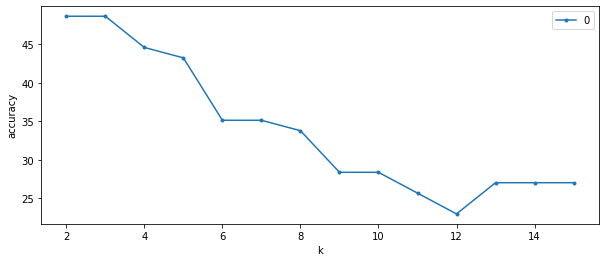

In [102]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata MINKOWSKI
data=pd.DataFrame(knnCatWynikiNWyplata[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

            0
2   52.702703
3   50.000000
4   44.594595
5   44.594595
6   40.540541
7   39.189189
8   40.540541
9   33.783784
10  31.081081
11  31.081081
12  27.027027
13  31.081081
14  31.081081
15  29.729730


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

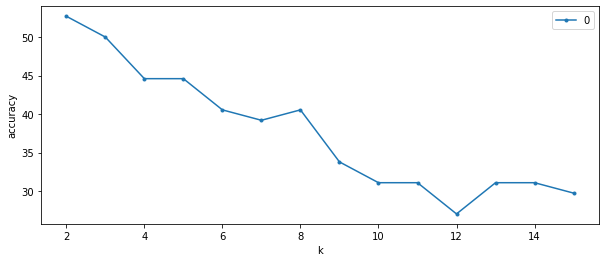

In [103]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata TAXI
data=pd.DataFrame(knnCatWynikiNWyplata[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

In [197]:
#Klasyfikacja k najbliższych sąsiadów
class KNN:
    @staticmethod
    def taxi(x,y):
        s=0
        for k in range(len(y)):
            s+=abs(x[k]-y[k])
        return s
    
    @staticmethod
    def minkowski(v1,v2,m):
        distance=0
        for e in range(0,len(v1)):
            distance+=abs(v1[e]-v2[e])**m
        #print(distance**(1/m))
        return distance**(1/m)
    
    
    @staticmethod
    def clustering(data,sample,k,objects,typeOfCalculation,colName):
        
        distances=[]
        #TODO: Klasy będą inne, bo będzie ich tyle ile mamy stanowisk pracy w obiekcie objects1
        classes=[0 for x in range(len(objects))] #wszytskie stanowiska pracy
        #classes = {1:0,2:0,3:0}
        #liczy dystans do każdego rekordu od sample
        for x in range(len(data)):
            #print(data.iloc[x])
            if typeOfCalculation==0:
                distances.append(KNN.minkowski(sample,data.iloc[x],2))
            elif typeOfCalculation==1:
                distances.append(KNN.taxi(sample,data.iloc[x]))

        #sortuje według dodanej kolumny odległości, od najmniejszej do największej
        data=data.assign(dist=distances)
        data=data.sort_values(by=['dist'])
        data=data.drop(['dist'],axis=1)
        
        
        
        
        #Liczy dla k pierwszych rekordów z data jakiego typu są te wartości
        for i in range(0,k):
            classes[int(data.at[i,colName])]+=1
        #print(classes.index(max(classes)))
        #return classes.index(max(classes)), 
        return classes.index(max(classes))

In [127]:
#Analiza tylkko biorąc w knn job_title
knnWynikiZnormalizowane=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(normalizedData,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t,'job_title'))
    print(solution)
    knnWynikiZnormalizowane.append(solution)


[5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405]
[5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405]


In [ ]:
#Dla róznych kolumn chcę uzyskac najlepszy algorytm knn z k określonym i zapisac dokładność do DataFrame
colNames=["job_title","company_location","employment_type","company_size"]

finAccuracies=[]
for c in ["job_title"]:    
    for t in range(0,2):
        accuracies=[]
        for k in rangeOfK:
            tmpTrain,tmpTest=ProcessingData.splitSet(processedData,0.7)
            accuracies.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy[c].cat.categories.tolist(),t,c))
            print(accuracies)
        finAccuracies.append([c,t,max(accuracies),rangeOfK[accuracies.index(max(accuracies))]])

           0
2   5.405405
3   5.405405
4   5.405405
5   5.405405
6   5.405405
7   5.405405
8   5.405405
9   5.405405
10  5.405405
11  5.405405
12  5.405405
13  5.405405
14  5.405405
15  5.405405


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

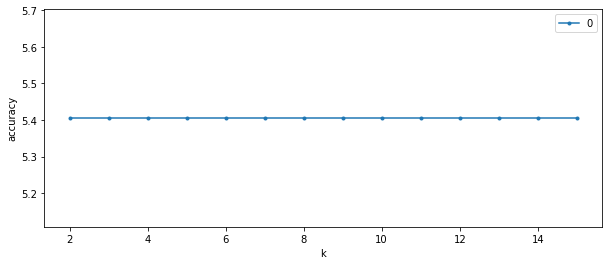

In [105]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata MINKOWSKI
data=pd.DataFrame(knnWynikiZnormalizowane[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

           0
2   5.405405
3   5.405405
4   5.405405
5   5.405405
6   5.405405
7   5.405405
8   5.405405
9   5.405405
10  5.405405
11  5.405405
12  5.405405
13  5.405405
14  5.405405
15  5.405405


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

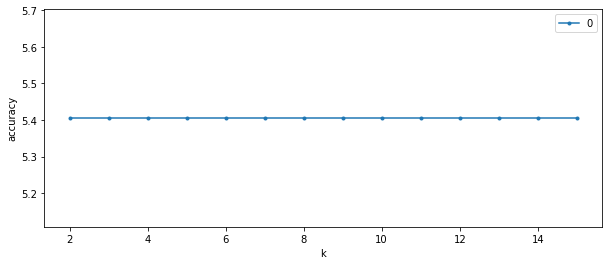

In [106]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata TAXI
data=pd.DataFrame(knnWynikiZnormalizowane[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

In [89]:
#Analiza znormalizowana dla kolumny wypłata
knnWynikiZnormalizowaneWyplata=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(processedData,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t))
    print(solution)
    knnWynikiZnormalizowaneWyplata.append(solution)


[52.702702702702695, 47.2972972972973, 47.2972972972973, 47.2972972972973, 41.891891891891895, 36.486486486486484, 35.13513513513514, 31.08108108108108, 31.08108108108108, 28.37837837837838, 28.37837837837838, 31.08108108108108, 27.027027027027028, 29.72972972972973]
[58.108108108108105, 52.702702702702695, 50.0, 45.94594594594595, 44.5945945945946, 37.83783783783784, 40.54054054054054, 36.486486486486484, 36.486486486486484, 35.13513513513514, 32.432432432432435, 35.13513513513514, 35.13513513513514, 35.13513513513514]


            0
2   47.297297
3   45.945946
4   45.945946
5   45.945946
6   40.540541
7   35.135135
8   33.783784
9   31.081081
10  31.081081
11  31.081081
12  28.378378
13  31.081081
14  27.027027
15  29.729730


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

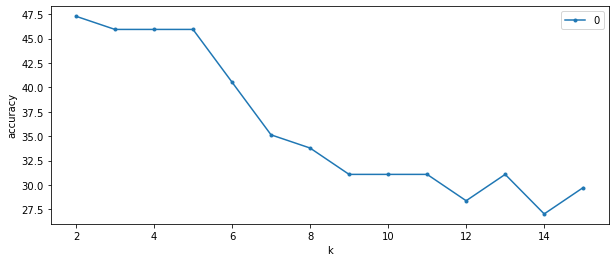

In [107]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata MINKOWSKI
data=pd.DataFrame(knnWynikiZnormalizowaneWyplata[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

            0
2   52.702703
3   48.648649
4   45.945946
5   44.594595
6   43.243243
7   36.486486
8   39.189189
9   37.837838
10  37.837838
11  37.837838
12  35.135135
13  37.837838
14  31.081081
15  33.783784


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

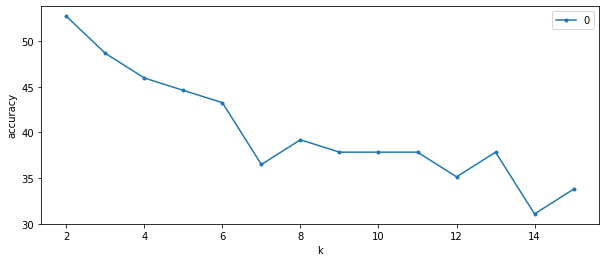

In [108]:
#Wykres dokładności znormalizowancyh danych dla kolumny wypłata TAXI
data=pd.DataFrame(knnWynikiZnormalizowaneWyplata[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

In [90]:
#Analiza nieznormalizowana
knnWynikiNieznormalizowane=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(df,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t))
    print(solution)
    knnWynikiNieznormalizowane.append(solution)


[40.54054054054054, 35.13513513513514, 31.08108108108108, 29.72972972972973, 31.08108108108108, 31.08108108108108, 32.432432432432435, 33.78378378378378, 28.37837837837838, 29.72972972972973, 28.37837837837838, 28.37837837837838, 28.37837837837838, 28.37837837837838]
[41.891891891891895, 36.486486486486484, 31.08108108108108, 29.72972972972973, 31.08108108108108, 31.08108108108108, 32.432432432432435, 33.78378378378378, 28.37837837837838, 29.72972972972973, 28.37837837837838, 28.37837837837838, 28.37837837837838, 28.37837837837838]


            0
2   40.540541
3   35.135135
4   31.081081
5   29.729730
6   31.081081
7   31.081081
8   32.432432
9   33.783784
10  28.378378
11  29.729730
12  28.378378
13  28.378378
14  28.378378
15  28.378378


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

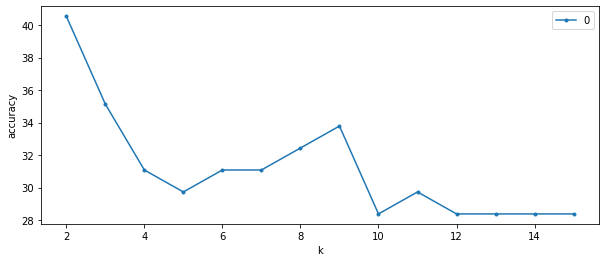

In [112]:
#Wykres dokładności nieznormalizowanych danych MINKOWSKI
data=pd.DataFrame(knnWynikiNieznormalizowane[0],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

            0
2   41.891892
3   36.486486
4   31.081081
5   29.729730
6   31.081081
7   31.081081
8   32.432432
9   33.783784
10  28.378378
11  29.729730
12  28.378378
13  28.378378
14  28.378378
15  28.378378


<AxesSubplot:xlabel='k', ylabel='accuracy'>

<Figure size 432x288 with 0 Axes>

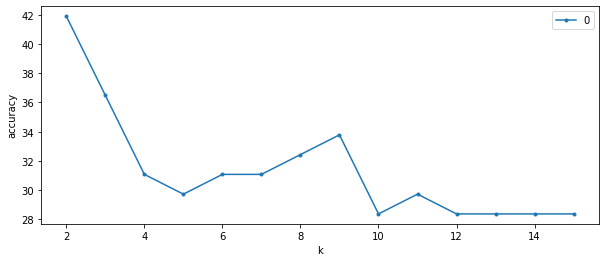

In [113]:
#Wykres dokładności nieznormalizowanych danych TAXI
data=pd.DataFrame(knnWynikiNieznormalizowane[1],rangeOfK)
print(data)
plt.figure()
data.plot(xlabel="k",ylabel="accuracy",marker=".",figsize=(10,4))

In [94]:
#Usuwam label analizuje dokładności
#Analiza nieznormalizowana
# df=df.drop(['label'],axis=1)

knnWynikiNieznormalizowane=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(df,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t))
    print(solution)
    knnWynikiNieznormalizowane.append(solution)


[40.54054054054054, 35.13513513513514, 31.08108108108108, 29.72972972972973, 31.08108108108108, 31.08108108108108, 32.432432432432435, 33.78378378378378, 28.37837837837838, 29.72972972972973, 28.37837837837838, 28.37837837837838, 28.37837837837838, 28.37837837837838]
[41.891891891891895, 36.486486486486484, 31.08108108108108, 29.72972972972973, 31.08108108108108, 31.08108108108108, 32.432432432432435, 33.78378378378378, 28.37837837837838, 29.72972972972973, 28.37837837837838, 28.37837837837838, 28.37837837837838, 28.37837837837838]


In [95]:
#Analiza znormalizowana dla kolumny wypłata
processedData=processedData.drop(['label'],axis=1)
knnWynikiZnormalizowaneWyplata=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(processedData,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t))
    print(solution)
    knnWynikiZnormalizowaneWyplata.append(solution)

#Udowodniono brak wpływu kolumny label na dane/klasyfikację

[47.2972972972973, 45.94594594594595, 45.94594594594595, 45.94594594594595, 40.54054054054054, 35.13513513513514, 33.78378378378378, 31.08108108108108, 31.08108108108108, 31.08108108108108, 28.37837837837838, 31.08108108108108, 27.027027027027028, 29.72972972972973]
[52.702702702702695, 48.64864864864865, 45.94594594594595, 44.5945945945946, 43.24324324324324, 36.486486486486484, 39.189189189189186, 37.83783783783784, 37.83783783783784, 37.83783783783784, 35.13513513513514, 37.83783783783784, 31.08108108108108, 33.78378378378378]


In [96]:
#Analiza tylkko biorąc w knn job_title
normalizedData=normalizedData.drop(['label'],axis=1)
knnWynikiZnormalizowane=[]
for t in range(0,2):
    solution=[]
    for k in rangeOfK:    
        tmpTrain,tmpTest=ProcessingData.splitSet(normalizedData,0.7)
        solution.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy['job_title'].cat.categories.tolist(),t))
    print(solution)
    knnWynikiZnormalizowane.append(solution)
#Ewidentnie dla wszstkich kolumn znormalizownaych nie ma sensu 

[5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405]
[5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405, 5.405405405405405]


In [180]:
#Dla róznych kolumn chcę uzyskac najlepszy algorytm knn z k określonym i zapisac dokładność do DataFrame
colNames=["job_title","company_location","employment_type","company_size"]

finAccuracies=[]
for c in ["job_title"]:    
    for t in range(0,2):
        accuracies=[]
        for k in rangeOfK:
            tmpTrain,tmpTest=ProcessingData.splitSet(processedData.copy(),0.7)
            accuracies.append(Analize.analizeKNN(tmpTrain,tmpTest,k,dfCopy[c].cat.categories.tolist(),t,c))
            print(accuracies)
        finAccuracies.append([c,t,max(accuracies),rangeOfK[accuracies.index(max(accuracies))]])

[0.0]
[0.0, 36.486486486486484]
[0.0, 36.486486486486484, 0.0]
[0.0, 36.486486486486484, 0.0, 0.0]
[0.0, 36.486486486486484, 0.0, 0.0, 36.486486486486484]
[0.0, 36.486486486486484, 0.0, 0.0, 36.486486486486484, 36.486486486486484]
[0.0, 36.486486486486484, 0.0, 0.0, 36.486486486486484, 36.486486486486484, 0.0]
[0.0, 36.486486486486484, 0.0, 0.0, 36.486486486486484, 36.486486486486484, 0.0, 0.0]


KeyboardInterrupt: 

In [171]:
finAccuracies

[['company_size', 0, 45.94594594594595, 2],
 ['company_size', 1, 45.94594594594595, 2]]

In [116]:
#Tworze tabelkę do zbioru miękkiego
indexNames=['KNN_Taxi_Salary_Norm','KNN_k=5']
columnNames=['job_title','experience']

pd.DataFrame([[1,2],[3,4]],indexNames,columnNames)

,job_title,experience
KNN_Taxi_Salary_Norm,1,2
KNN_k=5,3,4
